# Unsupervised Learning by Exploring the Iris Dataset

Iris are a [genus of flowering plants](https://en.wikipedia.org/wiki/Iris_(plant)) with over 310 species. There is even [one iris](https://en.wikipedia.org/wiki/Iris_orjenii) that exclusively grows in the Dinaric Alps, specifically in Bosnia and Herzegovina and Montenegro. 

The Iris dataset is small comparatively. It consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) including their [petal and sepal](https://qph.cf2.quoracdn.net/main-qimg-383a04d5c7458cc52bc091466bab85f8) length, stored in a 150x4 numpy array. We will start off with loading the Iris dataset and plotting the sepal width and sepal length in a scatter plot using matplotlib. The dataset has four features: sepal length(cm), sepal width(cm), petal length(cm), and petal width(cm). 

In [1]:
# Import Modules
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

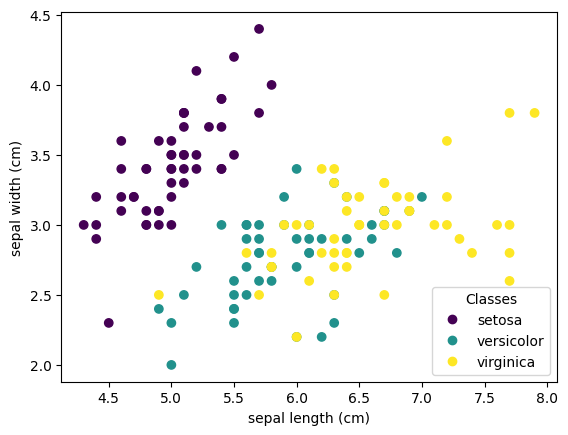

In [3]:
import matplotlib.pyplot as plt

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

We can already see that perhaps sepal features might be a good candidate for determining the difference between a setosa and the other two types of Iris as it has short, wide sepals but it does a poor job of telling us the difference between a versicolor and virginica. This  is because these are known not to be [linearily separable](https://archive.ics.uci.edu/dataset/53/iris).

Let's try to use the K-Means algorithm to create some clusters for us from the Iris dataset.

/home/s/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


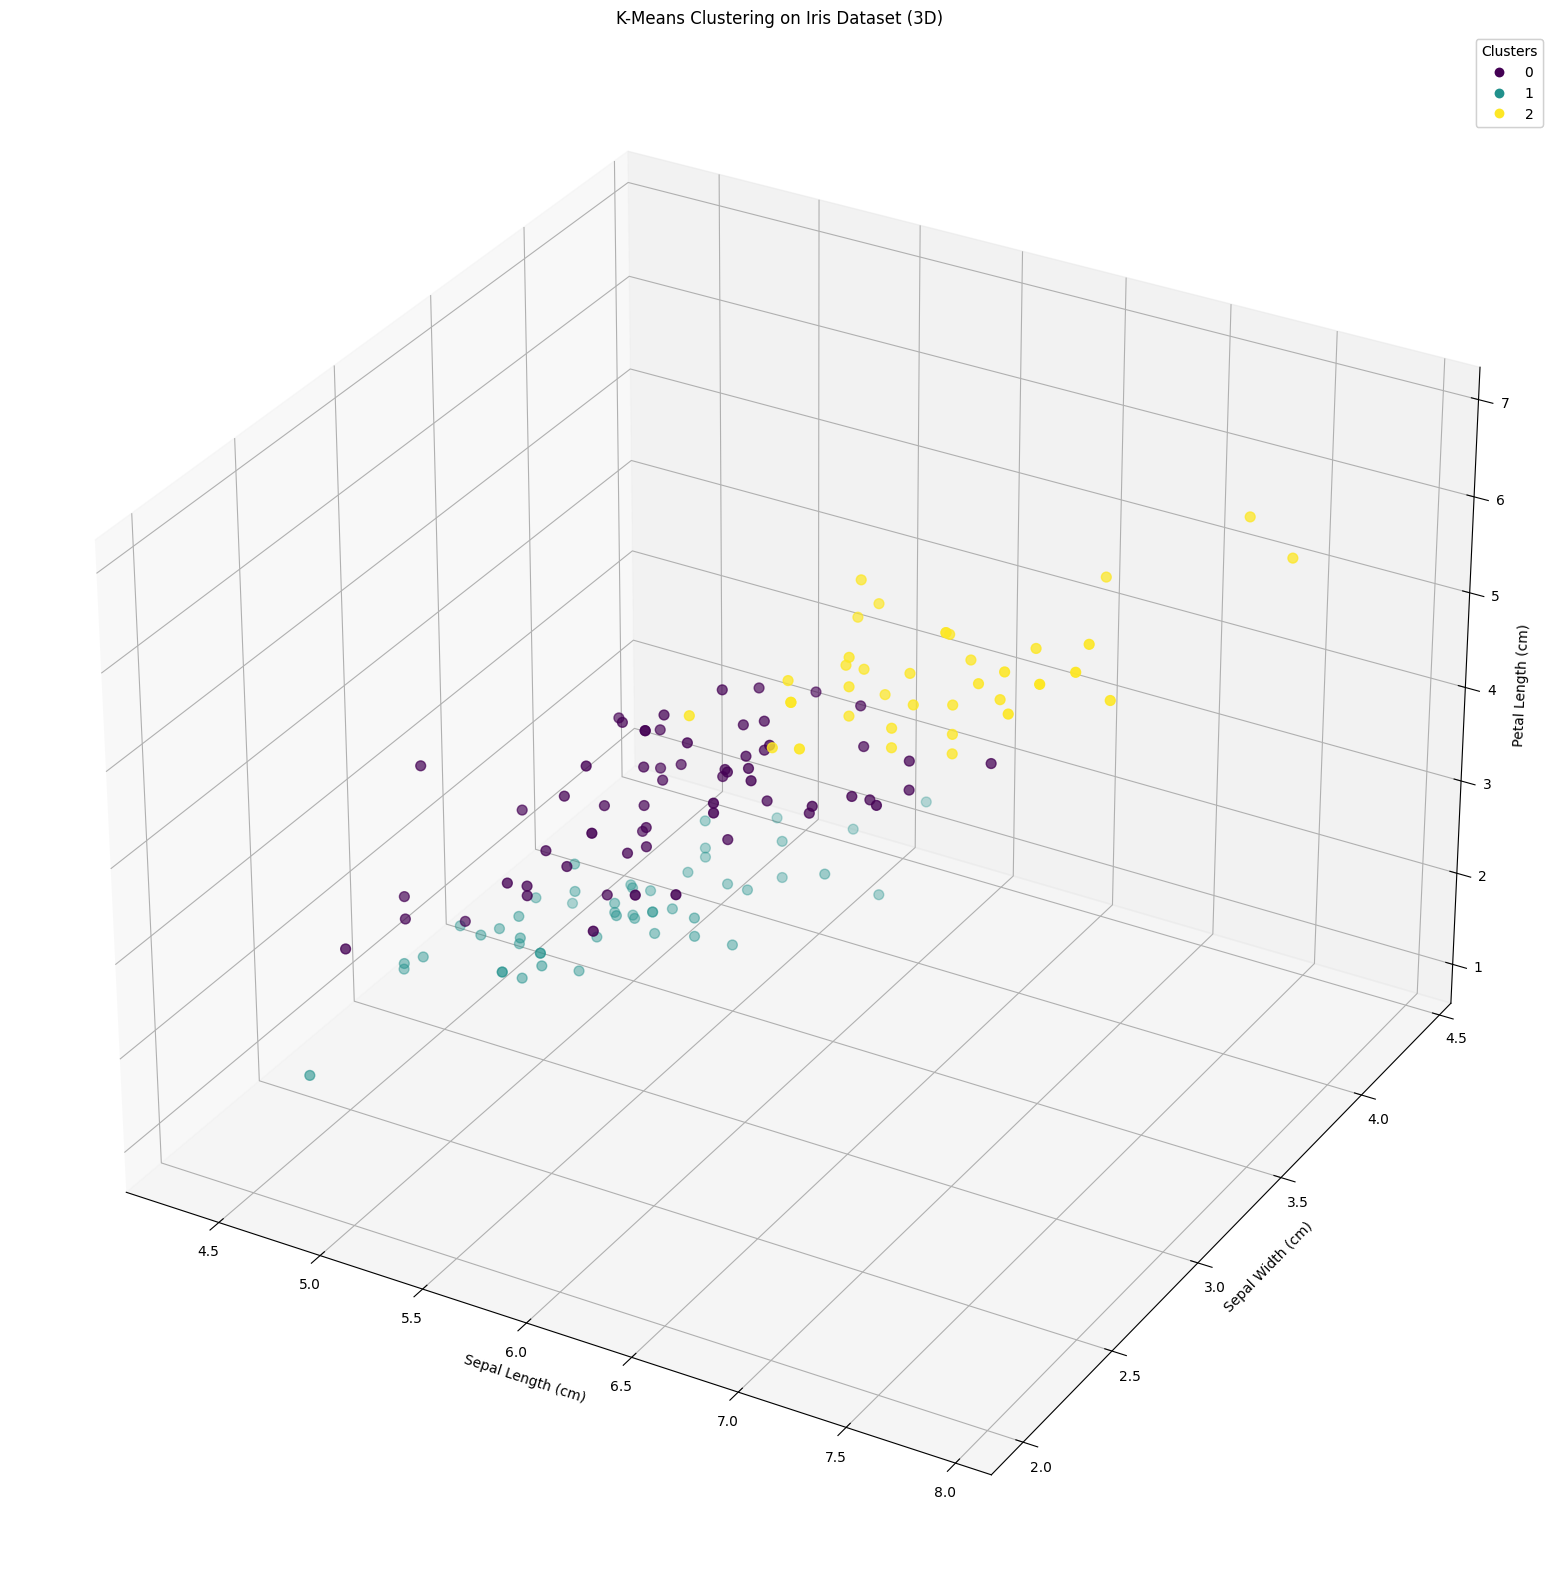

In [4]:
# Importing Modules
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Importing the 3D plotting toolkit
import pandas as pd

# Loading dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)  # Convert to DataFrame

# Declaring Model
model = KMeans(n_clusters=3, random_state=42)

# Fitting Model
model.fit(iris_df)

# Prediction on the entire data
all_predictions = model.predict(iris_df)

# Adding cluster labels to the dataset
iris_df['Cluster'] = all_predictions

# Creating a 3D scatter plot
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color-coded clusters
scatter = ax.scatter(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'], iris_df['petal length (cm)'],
                     c=iris_df['Cluster'], cmap='viridis', s=50)

# Adding labels
ax.set_title('K-Means Clustering on Iris Dataset (3D)')
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.set_zlabel('Petal Length (cm)')

# Adding a legend
legend = ax.legend(*scatter.legend_elements(), title='Clusters')
ax.add_artist(legend)

# Display the plot
plt.show()



K Means Clustering (and clustering in general) doesn't do a really great job of slicing these up as we would want. Let's try DB-Scan. 

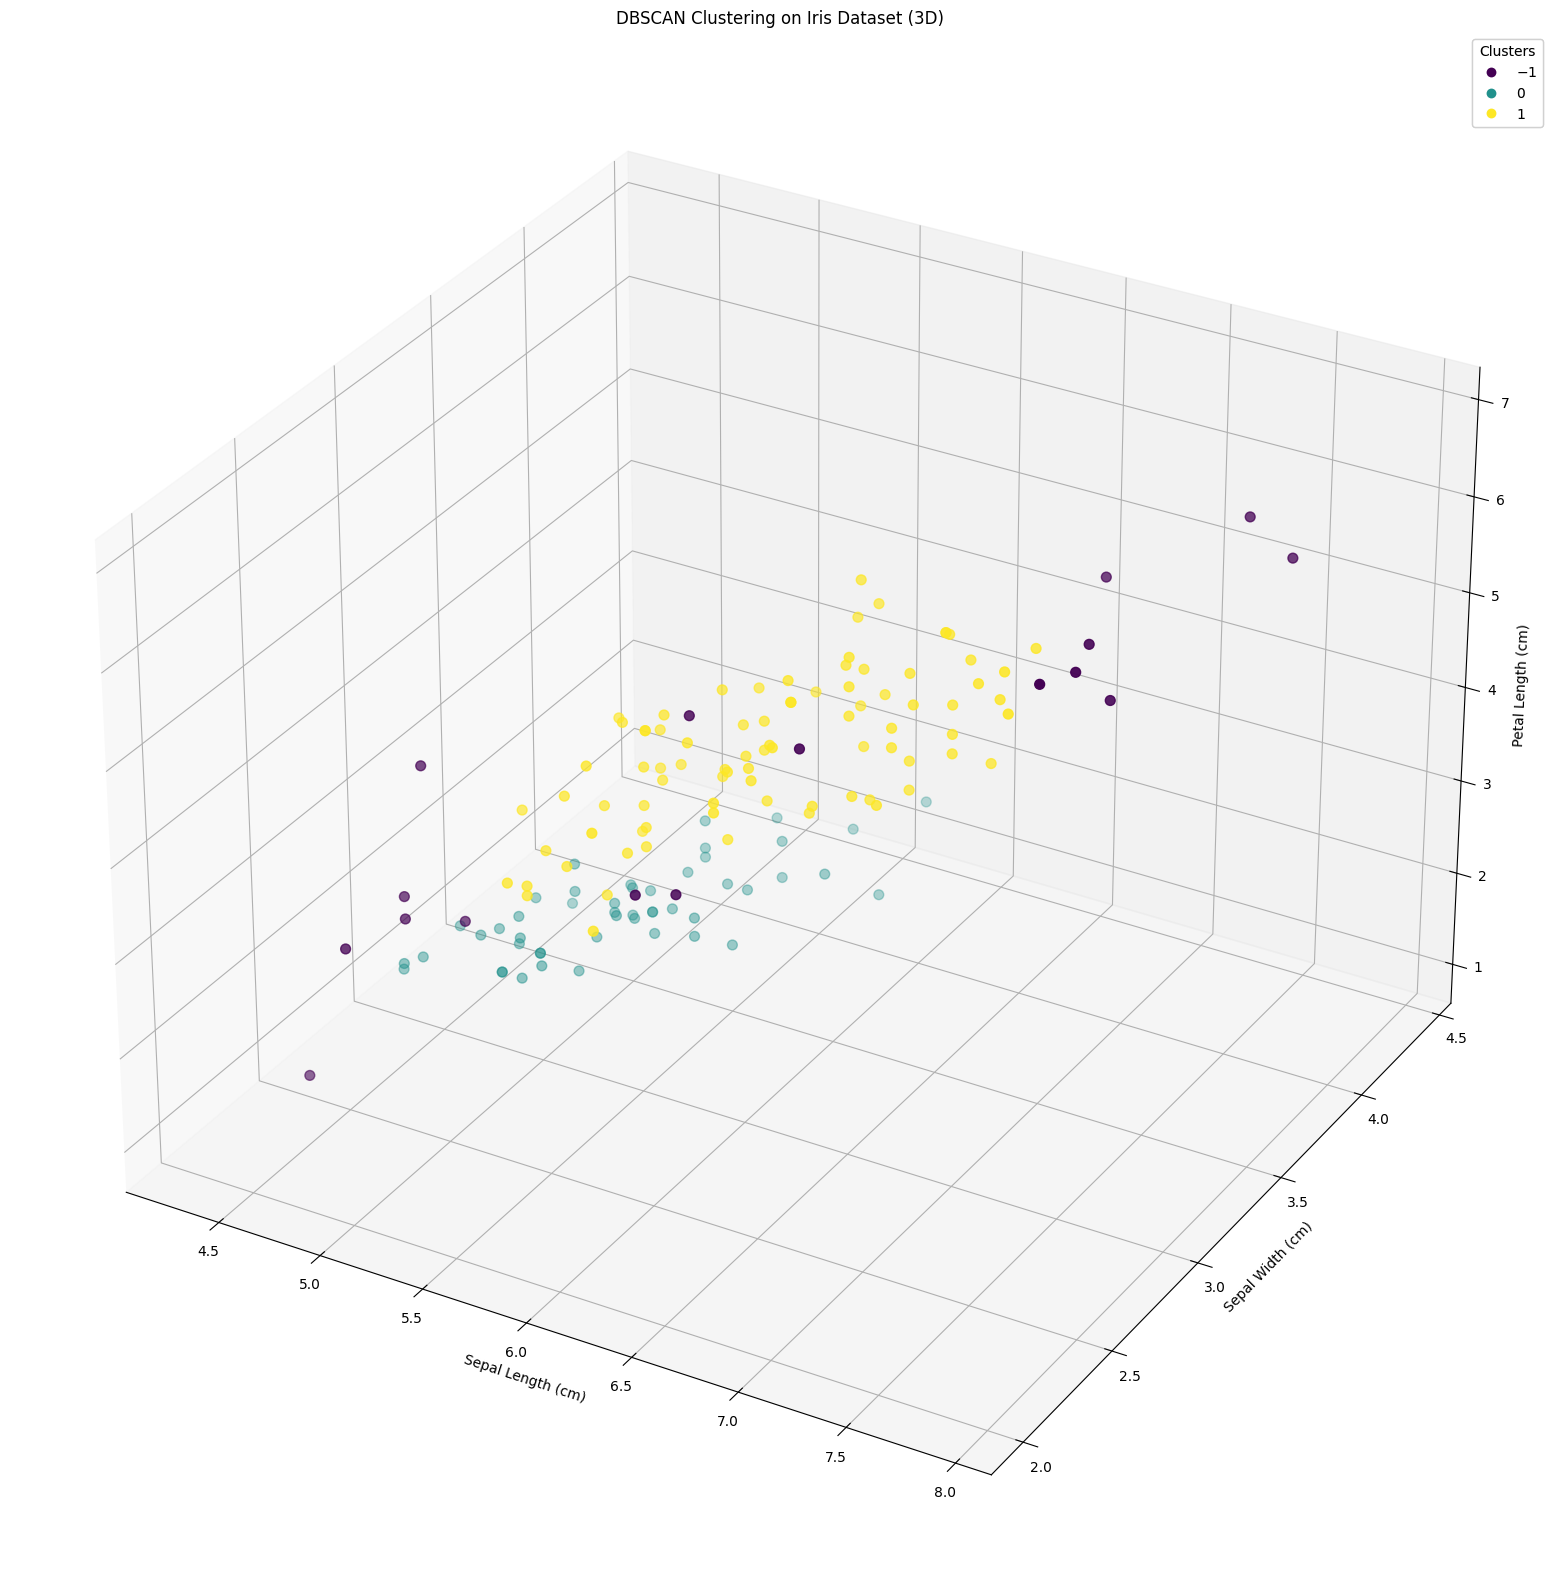

In [5]:
# Importing Modules
from sklearn import datasets
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Loading dataset
iris_df = datasets.load_iris()

# Defining Model
model = DBSCAN(eps=0.5, min_samples=5)  # You may need to adjust eps and min_samples based on your data

# Fitting Model
predicted_labels = model.fit_predict(iris_df.data)

# Adding cluster labels to the dataset
iris_df['Cluster'] = predicted_labels

# If you want to visualize in 3D, you can create a 3D scatter plot
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color-coded clusters
scatter = ax.scatter(iris_df.data[:, 0], iris_df.data[:, 1], iris_df.data[:, 2],
                     c=iris_df['Cluster'], cmap='viridis', s=50)

# Adding labels
ax.set_title('DBSCAN Clustering on Iris Dataset (3D)')
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.set_zlabel('Petal Length (cm)')

# Adding a legend
legend = ax.legend(*scatter.legend_elements(), title='Clusters')
ax.add_artist(legend)

# Display the plot
plt.show()

Similarly, DB Scan doesn't do great. This may be a good time to introduce dimensionality reduction. We know that these are not linearily separable, so let's try a non-linear approach. Looking back at our slides, t-SNE is one non-linear dimensionality reduction we can apply. Let's use [t-SNE](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) to scale more of the features down to a 2 dimensional space and see what we get.

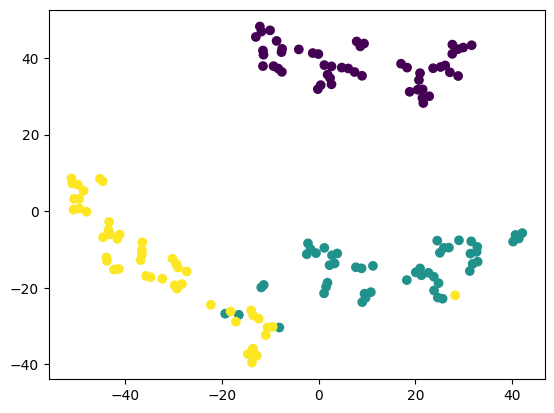

In [10]:
# Importing Modules
from sklearn import datasets
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Loading dataset
iris_df = datasets.load_iris()

# Defining Model
model = TSNE(learning_rate=100, perplexity=5)

# Fitting Model
transformed = model.fit_transform(iris_df.data)

# Plotting 2d t-Sne
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

plt.scatter(x_axis, y_axis, c=iris_df.target)
plt.show()

That's a *lot* better. We could consider doing outlier analysis to remove data points such as the yellow one that's still roped into the green. Play around with the perplexity hyperparameter and notice how wildly different the graph looks each time. I think this graph did a well enough job at displaying the dimensionality reduction and displays pretty decent separation comparatively. 